In [2]:
!pip install -q --upgrade diffusers invisible_watermark transformers accelerate safetensors
!pip install git+https://github.com/sedthh/pyxelate.git --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 31.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 32.6 MB/s eta 0:00:00
  Cloning https://github.com/sedthh/pyxelate.git to /tmp/pip-req-build-a71zpnot
  Running command git clone --filter=blob:none --quiet https://github.com/sedthh/pyxelate.git /tmp/pip-req-build-a71zpnot
  Resolved https://github.com/sedthh/pyxelate.git to commit fed220be1f97014d9d8607547cc1d4340044f7d9
  Preparing metadata (setup.py) ... done
  Created wheel for pyxelate: filename=pyxelate-2.1.1-py3-none-any.whl size=14741 sha256=5d6565b6230c29881ed047867874041418acb43edf298d454bbdb49f6fc4a3fe
  Stored in directory: /tmp/pip-ephem-wheel-cache-50ionvsc/wheels/97/77/7d/800f0715e9680a200fe6f483bc7ccf774601242c54938fee31
Successfully built pyxelate


In [3]:
import cv2
import matplotlib.pyplot as plt
import torch
from torch import autocast
from diffusers import StableDiffusionXLPipeline, EulerAncestralDiscreteScheduler

model = "Linaqruf/animagine-xl"

pipe = StableDiffusionXLPipeline.from_pretrained(
    model,
    torch_dtype=torch.float16,
    use_safetensors=True,
    variant="fp16",
    )
pipe.scheduler = EulerAncestralDiscreteScheduler.from_config(pipe.scheduler.config)
pipe.to('cuda')

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

model_index.json:   0%|          | 0.00/582 [00:00<?, ?B/s]

Fetching 18 files:   0%|          | 0/18 [00:00<?, ?it/s]

scheduler/scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/560 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

text_encoder_2/config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

tokenizer_2/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.71k [00:00<?, ?B/s]

tokenizer_2/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/607 [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/5.14G [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

StableDiffusionXLPipeline {
  "_class_name": "StableDiffusionXLPipeline",
  "_diffusers_version": "0.24.0",
  "_name_or_path": "Linaqruf/animagine-xl",
  "feature_extractor": [
    null,
    null
  ],
  "force_zeros_for_empty_prompt": true,
  "image_encoder": [
    null,
    null
  ],
  "scheduler": [
    "diffusers",
    "EulerAncestralDiscreteScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "text_encoder_2": [
    "transformers",
    "CLIPTextModelWithProjection"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "tokenizer_2": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

  0%|          | 0/50 [00:00<?, ?it/s]

(-0.5, 1023.5, 1023.5, -0.5)

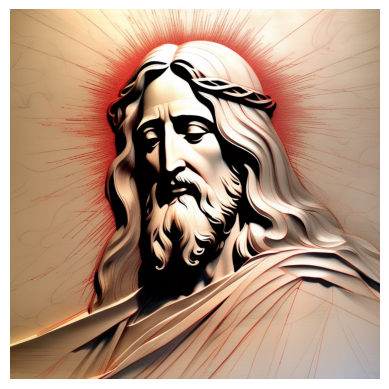

In [19]:
import matplotlib.pyplot as plt
from PIL import Image

prompt = "an ultra cartoon, Jesus in the style of Leonardo da Vinci, silverpoint, pen and ink, black and red chalk sanguine, sfumato technique, KidsIllustration, cool environment, cool background, extremly detailed, by Hajime Sorayama, by Henry Asenci, by (Quentin Blake:0.5), saturated"
negative_prompt = "incorrect hands, extra limbs, extra fingers, fused fingers, missing facial features, low quality, bad quality, bad anatomy, Missing limbs, missing fingers, scary, ugly,two heads, two face, out of frame, mutated hands, poorly drawn hands, poorly drawn face, mutation, deformed, blurry, bad proportions,disfigured,gross proportions, malformed limbs, missing arms, missing legs, extra arms, extra legs, mutated hands, fused fingers, too many fingers, long neck, poorly drawn eyes,"
output = "/content/picture.png"

image = pipe(
    prompt,
    negative_prompt=negative_prompt,
    width=1024,
    height=1024,
    guidance_scale=12,
    target_size=(1024,1024),
    original_size=(4096,4096),
    num_inference_steps=50
    ).images[0]

image.save(output)
image = Image.open(output)
plt.imshow(image)
plt.axis('off') # to hide the axis


/usr/local/lib/python3.10/dist-packages/pyxelate/pyx.py:94: PyxWarning: 'Pyxelate could not properly assign colors, try a different palette size for better results!'
  warnings.warn("Pyxelate could not properly assign colors, try a different palette size for better results!", PyxWarning)


(-0.5, 101.5, 101.5, -0.5)

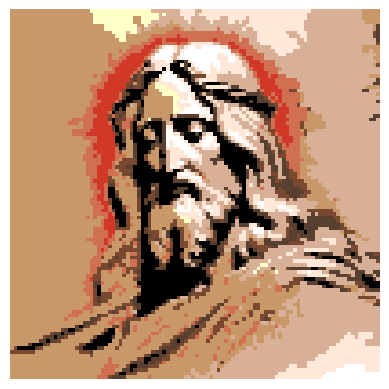

In [20]:
from skimage import io
from pyxelate import Pyx, Pal

image = io.imread("picture.png")

downsample_by = 10  # 縮放大小1/10
palette = 10  # 取色
depth = 1

# 1) Instantiate Pyx transformer
pyx = Pyx(factor=downsample_by, palette=palette, depth=depth)

# 2) fit an image, allow Pyxelate to learn the color palette
pyx.fit(image)

# 3) transform image to pixel art using the learned color palette
new_image = pyx.transform(image)

# 存圖片
io.imsave("pixel.png", new_image)

plt.imshow(new_image)
plt.axis('off') # to hide the axis

In [18]:
import gc

#if "pipe" in globals():
#    del pipe
if "image" in globals():
    del image
torch.cuda.empty_cache()
gc.collect()

2126